In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import matplotlib as mpl
import os

from IPython.core.pylabtools import figsize
from scipy import stats

from sklearn.model_selection import train_test_split

In [2]:
#Getting Working Directory
os.getcwd()

#Setting style and font size for graphs
sns.set_style("whitegrid")
mpl.rcParams['font.size'] = 13

In [21]:
#load original data into dataframe
file ='train_clean.csv'

#chunksize = 10 ** 6
#for chunk in pd.read_csv(file, chunksize=chunksize):
#    process(chunk)

df = pd.read_csv(file)
df.shape

(7377415, 70)

In [22]:
#df.info()

In [23]:
#df.drop('msno', axis=1, inplace = True)

df['isrc_year'] = df.isrc_year.apply(lambda x: x if x != 'year_missing' else -1)
df['isrc_year'] = df['isrc_year'].astype('int8')

#Converting to categories
cat_names = list(df.select_dtypes(include='object').columns)
df[cat_names] = df[cat_names].astype('category')
#df['language'] = df['language'].astype('category')

int_names = list(df.select_dtypes(include='int64').columns)
df[int_names] = df[int_names].astype('int32')

int_names_8 = ['composer_artist_lyricist', 'composer_artist']
df[int_names_8] = df[int_names_8].astype('uint8')


float_names = list(df.select_dtypes(include='float64').columns)
df[float_names] = df[float_names].astype('float32')

float_names = list(df.select_dtypes(include='float32').columns)
float_names.remove('song_length')
df[float_names] = df[float_names].astype('float16')

#ua = ['ua_1', 'ua_2', 'ua_3', 'ua_4', 'ua_5', 'ua_6', 'ua_7', 'ua_8', 'ua_9', 'ua_10']
#df.drop('genre_ids_encoded', axis=1, inplace = True)
#df.drop('artist_name_encoded', axis=1, inplace = True)

#df.info()

In [24]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377415 entries, 0 to 7377414
Data columns (total 70 columns):
msno                        category
source_system_tab           category
source_screen_name          category
source_type                 category
target                      int32
song_length                 float32
language                    float16
city                        int32
bd                          int32
gender                      category
registered_via              int32
lyricist_count              int32
artist_count                int32
composer_count              int32
genre_count                 int32
isrc_year                   int8
duration                    int32
registration_year           int32
registration_month          int32
registration_day            int32
registration_weekday        int32
expiration_year             int32
expiration_month            int32
expiration_day              int32
expiration_weekday          int32
song_freq          

In [6]:
# Separating Numeric and Non_numeric Data
numeric = df.select_dtypes(exclude = 'category')
categorical = df.select_dtypes(include = 'category')

#Creating Dummy variables for Categorical Data using One Hot Encoding
dummies = pd.get_dummies(categorical,drop_first = True)

In [8]:
#numeric.skew()

In [7]:
#Creating our Feature and Target Data Set: X, y respectively

X = pd.concat([numeric,dummies],axis=1).drop('target', axis = 1)
y = df.target

#Splitting Data into Training and Test Data Set
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

mean_length = X_train.song_length.mean()
X_train.song_length.fillna(mean_length, inplace = True)
X_test.song_length.fillna(mean_length, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688707 entries, 1069668 to 6413414
Columns: 106 entries, song_length to gender_male
dtypes: float16(41), float32(1), int32(19), int8(1), uint8(44)
memory usage: 756.3 MB


In [8]:
X_train['language'] = X_train['language'].astype('int16')
X_test['language'] = X_test['language'].astype('int16')

int_names = list(X_train.select_dtypes(include='int32').columns)
X_train[int_names] = X_train[int_names].astype('int16')
X_test[int_names] = X_test[int_names].astype('int16')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688707 entries, 1069668 to 6413414
Columns: 106 entries, song_length to gender_male
dtypes: float16(40), float32(1), int16(20), int8(1), uint8(44)
memory usage: 622.7 MB


In [44]:
diff = list(set(df.msno.iloc[X_test.index])-set(df.msno.iloc[X_train.index]))
diff_index = df[df.msno.isin(diff)].index

In [45]:
diff_index

Int64Index([   1988,    8152,   43998,   44024,   44028,   52421,   63693,
             105130,  112998,  112999,
            ...
            7352952, 7356086, 7357192, 7361337, 7361715, 7364763, 7364764,
            7375493, 7377310, 7377311],
           dtype='int64', length=1249)

In [47]:
X_train[X_train.index == 1988]

,song_length,language,city,bd,registered_via,lyricist_count,artist_count,composer_count,genre_count,isrc_year,...,source_type_my-daily-playlist,source_type_online-playlist,source_type_radio,source_type_song,source_type_song-based-playlist,source_type_source_type_missing,source_type_top-hits-for-artist,source_type_topic-article-playlist,gender_gender_missing,gender_male


There are two types of error, False Positive and False Negative. Predicting that a patient will not get readmitted but actually patient gets readmitted. This is false negative. Predicting that a patient will get readmitted but in actually he will not os called false positive. For an hospital, a false negative error is not desirable. They can still live with a false positive error. So in below models we will look at reducing false negative error. 

High Recall for class 'Readmitted', Better the model


Ensuring that we have the same fractions of all class in both train and test data set. Let's Calculate the fraction

### Logistic Regression

In [13]:
# Base Line Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, balanced_accuracy_score, plot_roc_curve
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import plot_confusion_matrix, precision_recall_fscore_support,log_loss
class_names = ['Not Listened', 'Listened']

In [14]:
def auc_curve(y_test,y_pred_test,auc_test):
    fpr,tpr, threshold = roc_curve(y_test, y_pred_test)
    _ = plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' %auc_test )
    _ = plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    _ = plt.xlim([0.0, 1.0])
    _ = plt.ylim([0.0, 1.05])
    _ = plt.xlabel('False Positive Rate')
    _ = plt.ylabel('True Positive Rate')
    _ = plt.title('Receiver operating characteristic example')
    _ = plt.legend(loc="lower right")


### Base Line Evaluation - L2

In [ ]:
# Base Line Evaluation

#Building the Logistic Regression Model
lr = LogisticRegression(verbose = 2,n_jobs = 2)

lr.fit(X_train,y_train)

#Predicting for testing and trainig data sets
y_test_proba = lr.predict_proba(X_test)[:,1]
y_train_proba = lr.predict_proba(X_train)[:,1]

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

#Accuracy Score
print("Training accuracy: %0.4f" %lr.score(X_train, y_train))
print("Test accuracy    : %0.4f" %lr.score(X_test, y_test))
#print("Test log loss    : %0.4f" %log_loss(y_train, lr.predict_proba(X_train)))
#AUC Score
auc_train = roc_auc_score(y_train,y_train_proba)
auc_test = roc_auc_score(y_test,y_test_proba)

print('Training AUC Score: %0.4f' %auc_train)  
print('Testing AUC Score: %0.4f' %auc_test)          

print('Classification Report - Training')
print(classification_report(y_train,y_pred_train))

print('Classification Report - Testing')
print(classification_report(y_test,y_pred_test,target_names = class_names))

plot_confusion_matrix(lr, X_test, y_test,  cmap=plt.cm.Blues, normalize = 'true') #display_labels=class_names,
plt.show()
auc_curve(y_test,y_test_proba,auc_test)


In [ ]:
y = X_train.isna().sum()
y[y > 0]

In [ ]:
#np.all(np.isfinite(X_train))
np.any(np.isnan(X_train))

In [ ]:
coefficients = lr.coef_[0]
coef = pd.DataFrame(coefficients, index = X_train.columns, columns = ['Coefficient'])
coef.sort_values('Coefficient', inplace = True)
print("Top 5:")
print(coef[-5:] )

print("\nBottom 5:")
print(coef[:5])

### Base Line Evaluation  - L1

[LibLinear]Training accuracy: 0.6573
Test accuracy    : 0.6572
Training AUC Score: 0.7124
Testing AUC Score: 0.7124
Classification Report - Training
              precision    recall  f1-score   support

           0       0.66      0.63      0.65   1832448
           1       0.65      0.68      0.67   1856259

    accuracy                           0.66   3688707
   macro avg       0.66      0.66      0.66   3688707
weighted avg       0.66      0.66      0.66   3688707

Classification Report - Testing
              precision    recall  f1-score   support

Not Listened       0.66      0.63      0.65   1830311
    Listened       0.65      0.68      0.67   1858397

    accuracy                           0.66   3688708
   macro avg       0.66      0.66      0.66   3688708
weighted avg       0.66      0.66      0.66   3688708



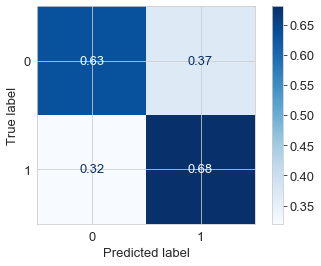

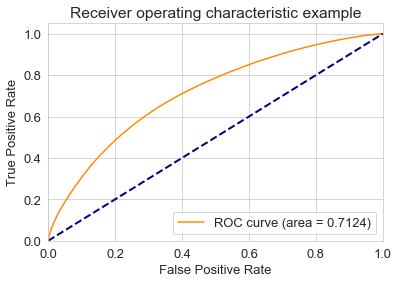

In [16]:
#Building the Logistic Regression Model
lr1 = LogisticRegression(penalty = 'l1', solver = 'liblinear', verbose = 2)

lr1.fit(X_train,y_train)

#Predicting for testing and trainig data sets
y_test_proba = lr1.predict_proba(X_test)[:,1]
y_train_proba = lr1.predict_proba(X_train)[:,1]

y_pred_test = lr1.predict(X_test)
y_pred_train = lr1.predict(X_train)

#Accuracy Score
print("Training accuracy: %0.4f" %lr1.score(X_train, y_train))
print("Test accuracy    : %0.4f" %lr1.score(X_test, y_test))
#print("Test log loss    : %0.4f" %log_loss(y_train, lr.predict_proba(X_train)))
#AUC Score
auc_train = roc_auc_score(y_train,y_train_proba)
auc_test = roc_auc_score(y_test,y_test_proba)

print('Training AUC Score: %0.4f' %auc_train)  
print('Testing AUC Score: %0.4f' %auc_test)          

print('Classification Report - Training')
print(classification_report(y_train,y_pred_train))

print('Classification Report - Testing')
print(classification_report(y_test,y_pred_test,target_names = class_names))

plot_confusion_matrix(lr1, X_test, y_test,  cmap=plt.cm.Blues, normalize = 'true') #display_labels=class_names,
plt.show()
auc_curve(y_test,y_test_proba,auc_test)

In [19]:
coefficients1 = lr1.coef_[0]
coef = pd.DataFrame(coefficients1, index = X_train.columns, columns = ['Coefficient'])
coef.sort_values('Coefficient', inplace = True)
#print("Zero Coefficient Features")
#print(coef[coef.Coefficient == 0])

print("\nBottom 5:")
print(coef[-10:])


Bottom 5:
                                 Coefficient
artist_name_encoded                 0.319899
source_system_tab_my library        0.328882
source_screen_name_Discover New     0.346622
source_type_source_type_missing     0.359205
composer_encoded                    0.428739
source_type_artist                  0.436034
source_type_local-library           0.448937
source_screen_name_Search           0.458770
name_encoded                        0.574201
source_type_local-playlist          0.745559


In [ ]:
figsize(12,7)
main = np.concatenate((lr.coef_,lr1.coef_), axis =0).T
coef = pd.DataFrame(main, index = X_train.columns, columns = ['l2','l1'])
_ = coef.plot()
_ = plt.xticks(rotation = 90)


#### Post Standardization 

#### Feature Interactions

Not much change in values for accuracy score for different Interactions

In [ ]:
# Pre-processing: Standardization numeric variables
pd.options.mode.chained_assignment = None

transform_col = df.select_dtypes(exclude = 'category') \
                .drop(['target','composer_artist_lyricist','composer_artist'], axis = 1).columns

def standardize(train,test, feature_name):
    for col in feature_name:
        mean = train[col].mean()
        sd = train[col].std()
        train[col] = (train[col] - mean)/sd
        test[col] = (test[col] - mean)/sd

    return train, test

X_train_sc, X_test_sc = standardize(X_train, X_test, transform_col)
#print(X_train[transform_col].describe())
X_train_sc.info()

In [ ]:
figsize(5,5)
#Building the Logistic Regression Model
lr = LogisticRegression(penalty = 'l1', solver = 'liblinear', verbose = 2)

lr.fit(X_train_sc,y_train)

#Predicting for testing and trainig data sets
y_test_proba = lr.predict_proba(X_test_sc)[:,1]
y_train_proba = lr.predict_proba(X_train_sc)[:,1]

y_pred_test = lr.predict(X_test_sc)
y_pred_train = lr.predict(X_train_sc)

#Accuracy Score
print("Training accuracy: %0.4f" %lr.score(X_train_sc, y_train))
print("Test accuracy    : %0.4f" %lr.score(X_test_sc, y_test))
#print("Test log loss    : %0.4f" %log_loss(y_train, lr.predict_proba(X_train)))
#AUC Score
auc_train = roc_auc_score(y_train,y_train_proba)
auc_test = roc_auc_score(y_test,y_test_proba)

print('Training AUC Score: %0.4f' %auc_train)  
print('Testing AUC Score: %0.4f' %auc_test)          

print('Classification Report - Training')
print(classification_report(y_train,y_pred_train))

print('Classification Report - Testing')
print(classification_report(y_test,y_pred_test,target_names = class_names))

plot_confusion_matrix(lr, X_test_sc, y_test,  cmap=plt.cm.Blues, normalize = 'true') #display_labels=class_names,
plt.show()
auc_curve(y_test,y_test_proba,auc_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

C = [0.01,0.05, 0.1, 0.5]
#C = np.logspace(-3,-1,10)
#penalty = ['l1']
model1 = ['saga', 'liblinear']
param_grid = {'solver': model1, 'C': C}

lr = LogisticRegression(penalty = 'l1')

cv = GridSearchCV(lr,param_grid, cv=5, scoring = 'roc_auc', n_jobs = 2, verbose = 4)

cv.fit(X_train_sc,y_train)

print(cv.best_params_)
print(cv.best_score_)

In [ ]:
best_lr = cv.best_estimator_

best_lr.fit(X_train_sc,y_train)

#Predicting for testing and trainig data sets
y_test_proba = best_lr.predict_proba(X_test_sc)[:,1]
y_train_proba = best_lr.predict_proba(X_train_sc)[:,1]

y_pred_test = best_lr.predict(X_test_sc)
y_pred_train = best_lr.predict(X_train_sc)

#Accuracy Score
print("Training accuracy: %0.4f" %best_lr.score(X_train_sc, y_train))
print("Test accuracy    : %0.4f" %best_lr.score(X_test_sc, y_test))
#print("Test log loss    : %0.4f" %log_loss(y_train, lr.predict_proba(X_train)))
#AUC Score
auc_train = roc_auc_score(y_train,y_train_proba)
auc_test = roc_auc_score(y_test,y_test_proba)

print('Training AUC Score: %0.4f' %auc_train)  
print('Testing AUC Score: %0.4f' %auc_test)          

print('Classification Report - Training')
print(classification_report(y_train,y_pred_train))

print('Classification Report - Testing')
print(classification_report(y_test,y_pred_test,target_names = class_names))

plot_confusion_matrix(best_lr, X_test_sc, y_test,  cmap=plt.cm.Blues, normalize = 'true') #display_labels=class_names,
plt.show()
auc_curve(y_test,y_test_proba,auc_test)
